## Binomial Engine & Greeks — Extensive Test Notebook

This notebook runs a set of diagnostic tests comparing the CRR Binomial engine and the Greeks computed from it vs the Black-Scholes analytical engine/greeks. It is intentionally verbose with prints and small plots to help debugging and visual checks.

### Notes:
 - Run from the repository notebooks folder. The notebook adds the repo root to sys.path to import src modules.
 - The notebook assumes the code in src is up-to-date (e.g., BinomialEngine.price_and_levels present and GreeksStrategy implementations available).

## Set up directory (Run this cell only once)

In [ ]:
import os

# --- Step 1: Define the target folder relative to the current folder ---
# '..' means go up one level. '..\\..' means go up two levels.
relative_path_up_two = os.path.join('..', '..') 

# --- Step 2: Navigate up two levels (this assumes the notebook's current 
#             folder is the working directory, which is typical in Jupyter)
try:
    # Change the working directory to the target path
    os.chdir(relative_path_up_two)
    
    # Print the new directory for confirmation
    print(f"Successfully changed directory up two levels to: \n{os.getcwd()}")
    
except FileNotFoundError:
    print("Error: Could not navigate up two levels. Check your starting path.")


## Test greeks against analytical


Analytical greeks (Black-Scholes):
{'Delta': np.float64(0.51715069321939),
 'Gamma': np.float64(0.06951272300589144),
 'Price': np.float64(2.3275249119277177),
 'Rho': np.float64(4.059250225480379),
 'Theta': np.float64(-14.3964200452784),
 'Vega': np.float64(11.426748987269825)}

=== Comparison: n_steps=10 ===
   Greek |      Analytical |        Binomial |       AbsErr |      RelErr%
----------------------------------------------------------------------
   Price |        2.327525 |        2.327104 |    -0.000421 |      -0.0181
   Delta |        0.517151 |        0.517148 |    -0.000003 |      -0.0006
   Gamma |        0.069513 |        0.069193 |    -0.000320 |      -0.4599
   Theta |      -14.396420 |       34.586968 |    48.983388 |    -340.2470
    Vega |       11.426749 |       11.145074 |    -0.281675 |      -2.4651
     Rho |        4.059250 |        4.060409 |     0.001159 |       0.0286

=== Comparison: n_steps=50 ===
   Greek |      Analytical |        Binomial |       AbsEr

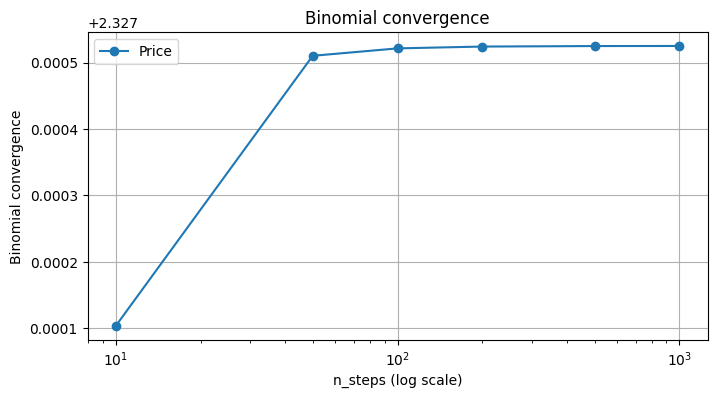

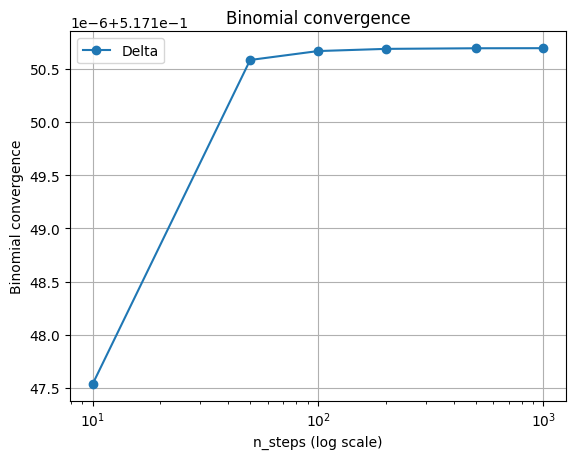

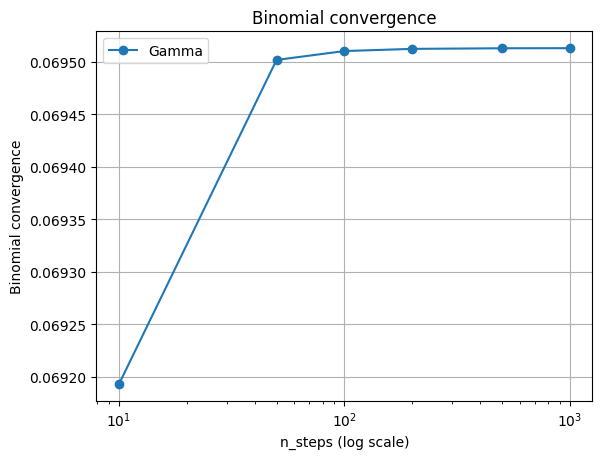


Grid results (sample):


,S,K,T_days,sigma,AnalPrice,BinPrice,PriceErr,AnalDelta,BinDelta,DeltaErr,AnalGamma,BinGamma,GammaErr
0,90,100,7,0.100000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
1,90,100,7,0.200000,0.000045,0.000045,-0.000000,0.000077,0.000077,-0.000001,0.000125,0.000124,-0.000001
2,90,100,7,0.500000,0.184295,0.184435,0.000140,0.068875,0.068910,0.000035,0.021278,0.021283,0.000005
3,90,100,30,0.100000,0.000088,0.000088,0.000000,0.000141,0.000141,0.000000,0.000211,0.000211,0.000000
4,90,100,30,0.200000,0.073181,0.072852,-0.000329,0.036365,0.036247,-0.000118,0.015450,0.015422,-0.000028
5,90,100,30,0.500000,1.845008,1.846135,0.001126,0.255396,0.255461,0.000065,0.024910,0.024907,-0.000004
6,90,100,180,0.100000,0.227870,0.227963,0.000093,0.081508,0.081530,0.000022,0.023856,0.023859,0.000003
7,90,100,180,0.200000,1.848521,1.846632,-0.001889,0.259519,0.259397,-0.000122,0.025636,0.025642,0.000005
8,90,100,180,0.500000,8.981499,8.979615,-0.001884,0.456022,0.455988,-0.000034,0.012548,0.012549,0.000002
9,100,100,7,0.100000,0.562059,0.562059,-0.000000,0.508287,0.508287,-0.000000,0.288014,0.288014,-0.000000


Analytical vega/rho: {'Vega': np.float64(11.426748987269825), 'Rho': np.float64(4.059250225480379)}

Bump sizes: [0.0001, 0.0005, 0.001, 0.005, 0.01]
Vega estimates: [np.float64(11.421037045697968), np.float64(11.421037029412329), np.float64(11.421036977887766), np.float64(11.421035335169094), np.float64(11.421030196032666)]
Rho estimates: [np.float64(4.059273709655642), np.float64(4.059273709655642), np.float64(4.059273709655642), np.float64(4.059273709655642), np.float64(4.059273709655642)]

Compare to analytical: Vega= 11.426748987269825 Rho= 4.059250225480379


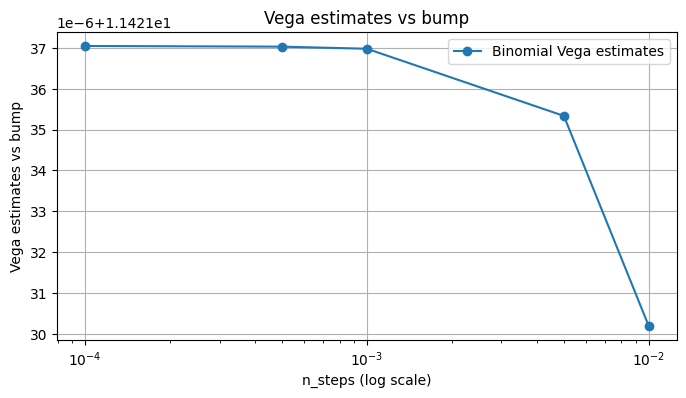

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

from src.engines.AnalyticalEngine import AnalyticalEngine
from src.greeks.AnalyticalGreeksStrategy import AnalyticalGreeksStrategy
from src.greeks.BinomialGreeksStrategy import BinomialGreeksStrategy
from src.engines.BinomialEngine import BinomialEngine
from src.products.EuropeanOption import EuropeanOption
from src.models.BlackScholesModel import BlackScholesModel


# ---
# ## Helper functions
# Functions used by the tests to compute, compare, format and plot results.
# ---

def compute_analytical_greeks(product, model):
 """Return greeks dict from AnalyticalGreeksStrategy."""
 strat = AnalyticalGreeksStrategy()
 return strat.calculate_greeks(product, model)

def compute_binomial_greeks(product, model, n_steps=200, use_richardson=True):
 strat = BinomialGreeksStrategy(n_steps=n_steps, use_richardson=use_richardson)
 return strat.calculate_greeks(product, model)

def compute_binomial_price(product, model, n_steps=200):
 engine = BinomialEngine(n_steps=n_steps)
 return engine.calculate_price(product, model)

def pretty_print_comparison(anal, binom, label=''):
  """Prints analytical and binomial greeks side by side with errors."""
  keys = ['Price','Delta','Gamma','Theta','Vega','Rho']
  print('\n=== Comparison:', label, '===')
  print('{:>8s} | {:>15s} | {:>15s} | {:>12s} | {:>12s}'.format('Greek','Analytical','Binomial','AbsErr','RelErr%'))
  print('-'*70)
  for k in keys:
    a = anal.get(k, float('nan'))
    b = binom.get(k, float('nan'))
    abs_err = b - a
    rel_err = (abs_err / a * 100) if (a and not np.isnan(a)) else float('nan')
    print('{:>8s} | {:15.6f} | {:15.6f} | {:12.6f} | {:12.4f}'.format(k, a, b, abs_err, rel_err))

def plot_convergence(ns, values, labels, title):
  plt.figure(figsize=(8,4))
  for val, lab in zip(values, labels):
    plt.plot(ns, val, marker='o', label=lab)
    plt.xscale('log')
    plt.xlabel('n_steps (log scale)')
    plt.ylabel(title)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# ---
# ## Single scenario detailed run
# Start with a canonical case (ATM call) and sweep n_steps to inspect convergence of price and greeks.
# ---

# Scenario parameters
S = 100.0
K = 100.0
T_days = 30 # days to expiry (EuropeanOption expects days when numeric)
sigma = 0.20 # vol
r = 0.01 # interest
q = 0.0 # dividend
qty = 1
option_type = 'call'

expiry_date = pd.Timestamp.today().date() + pd.Timedelta(days=T_days)
product = EuropeanOption(S=S, K=K, expiry_date=expiry_date, option_type=option_type, qty=qty)
model = BlackScholesModel(sigma=sigma, r=r, q=q)

anal_g = compute_analytical_greeks(product, model)
print('\nAnalytical greeks (Black-Scholes):')
pprint(anal_g)

# Sweep N
Ns = [10, 50, 100, 200, 500, 1000]
price_vals = []
delta_vals = []
gamma_vals = []
vega_vals = []
rho_vals = []
theta_vals = []

for N in Ns:
 bin_g = compute_binomial_greeks(product, model, n_steps=N, use_richardson=True)
 price_vals.append(bin_g['Price'])
 delta_vals.append(bin_g['Delta'])
 gamma_vals.append(bin_g['Gamma'])
 vega_vals.append(bin_g['Vega'])
 rho_vals.append(bin_g['Rho'])
 theta_vals.append(bin_g['Theta'])
 pretty_print_comparison(anal_g, bin_g, label=f'n_steps={N}')

print('\nPlotting convergence (Binomial values) vs n_steps')
plot_convergence(Ns, [price_vals, delta_vals, gamma_vals], ['Price','Delta','Gamma'], 'Binomial convergence')

# ---
# ## Parameter grid tests (moneyness, maturity, vol) — tabular summary
# Run many scenarios and print a tidy DataFrame with analytical vs binomial (N=500) and absolute errors.
# ---

def run_grid_tests(S_list, K_list, T_list_days, sigma_list, N=500):
 rows = []
 for S in S_list:
  for K in K_list:
   for T_days in T_list_days:
    for sigma in sigma_list:
     product = EuropeanOption(S=S, K=K, expiry_date=expiry_date, option_type='call', qty=1)
     model = BlackScholesModel(sigma=sigma, r=0.01, q=0.0)
     anal = compute_analytical_greeks(product, model)
     binom = compute_binomial_greeks(product, model, n_steps=N, use_richardson=True)
     rows.append({
      'S': S, 'K': K, 'T_days': T_days, 'sigma': sigma,
      'AnalPrice': anal['Price'], 'BinPrice': binom['Price'], 'PriceErr': binom['Price']-anal['Price'],
      'AnalDelta': anal['Delta'], 'BinDelta': binom['Delta'], 'DeltaErr': binom['Delta']-anal['Delta'],
      'AnalGamma': anal['Gamma'], 'BinGamma': binom['Gamma'], 'GammaErr': binom['Gamma']-anal['Gamma']
     })
 return pd.DataFrame(rows)

S_list = [90, 100, 110]
K_list = [100]
T_list_days = [7, 30, 180]
sigma_list = [0.10, 0.20, 0.50]

df = run_grid_tests(S_list, K_list, T_list_days, sigma_list, N=500)
pd.set_option('display.float_format', '{:,.6f}'.format)
print('\nGrid results (sample):')
display(df)

# ---
# ## Deep-dive on Vega & Rho (finite difference sensitivity)
# Check stability as we vary the bump size used for vega/rho calculations in the binomial strategy.
# ---

product = EuropeanOption(S=100, K=100, expiry_date=expiry_date, option_type='call', qty=1)
model = BlackScholesModel(sigma=0.20, r=0.01, q=0.0)
anal = compute_analytical_greeks(product, model)
print('Analytical vega/rho:', analy := {'Vega': anal['Vega'], 'Rho': anal['Rho']})

bump_list = [0.0001, 0.0005, 0.001, 0.005, 0.01]
vega_vals = []
rho_vals = []
Ns = 500
for bump in bump_list:
 # Use engine directly to compute central FD for vega/rho to explore stability
 orig_sigma = model.sigma
 model.sigma = orig_sigma + bump
 p_up = BinomialEngine(n_steps=Ns).calculate_price(product, model)
 model.sigma = orig_sigma - bump
 p_dn = BinomialEngine(n_steps=Ns).calculate_price(product, model)
 model.sigma = orig_sigma
 vega_est = (p_up - p_dn) / (2.0 * bump)
 vega_vals.append(vega_est)

 orig_r = model.r
 model.r = orig_r + 1e-4 if bump >= 1e-4 else orig_r + 1e-5
 p_r_up = BinomialEngine(n_steps=Ns).calculate_price(product, model)
 model.r = orig_r - 1e-4 if bump >= 1e-4 else orig_r - 1e-5
 p_r_dn = BinomialEngine(n_steps=Ns).calculate_price(product, model)
 model.r = orig_r
 rho_est = (p_r_up - p_r_dn) / (2.0 * (1e-4 if bump >= 1e-4 else 1e-5))
 rho_vals.append(rho_est)

print('\nBump sizes:', bump_list)
print('Vega estimates:', vega_vals)
print('Rho estimates:', rho_vals)
print('\nCompare to analytical: Vega=', anal['Vega'], 'Rho=', anal['Rho'])
plot_convergence(bump_list, [vega_vals], ['Binomial Vega estimates'], 'Vega estimates vs bump')

# ---
# ## Recommendations after running the tests
# - If price/greeks errors are large for small n_steps, increase n_steps or enable Richardson extrapolation.
# - If vega/rho are noisy, choose a larger finite-difference bump (0.5%–1% for vol is common) or compute vega analytically if available.
# - Consider enabling engine-level caching (BinomialEngine.price_and_levels) to speed repeated bump revaluations.
# ---

# ---
# ## Next steps (manual)
# 1. Save this notebook as notebooks/binomial_greeks_tests.ipynb.
# 2. Run it in Jupyter or VS Code interactive window.
# 3. If you want, I can: 
# - Apply a version of this notebook to the repository directly (create the file for you).
# - Add unit tests (pytest) implementing the same assertions automatically.
# - Tweak the BinomialGreeksStrategy to expose the bump sizes and allow running with different bump parameters from the GreeksCalculator API.
# ---